In [14]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# Beam pattern of a single dish

The beam of a single dish is exactly analogous to the diffraction pattern of a circular aperature. The width of the beam scales inversely as the diameter of the dish.

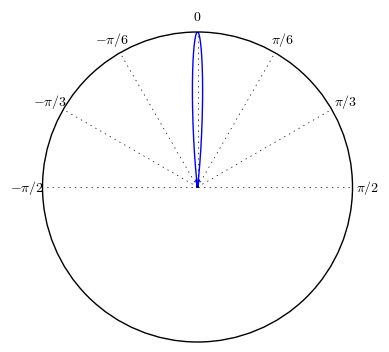

In [15]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = 200 #wavelength
a = 1400 #diameter of dish
I = (np.sinc(a*np.sin(theta)/wv))**2

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I)

# Beam Pattern of Interferometer

An interferometer modulates the beam pattern of a single dish- exactly like interference between multiple finite width slits.

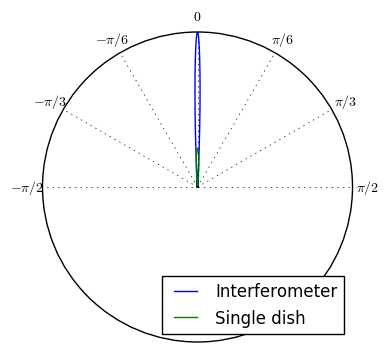

In [23]:
theta = np.linspace(-np.pi/5,np.pi/5,num=10000)
wv = 200  # wavelength 
a = 1400  # diameter
d = 1400 # distance between antennas
N = 2    # number of antennas

phi = np.pi*d*np.sin(theta)/wv
I = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2 

ax = plt.subplot(111,projection='polar')
ax.set_theta_zero_location('N')
ax.set_theta_direction(-1)
ax.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax.set_yticks([])
ax.set_yticklabels([])
ax.plot(theta,I,label='Interferometer')
ax.plot(theta,(np.sinc(a*np.sin(theta)/wv))**2,label='Single dish')
ax.legend(loc=4)

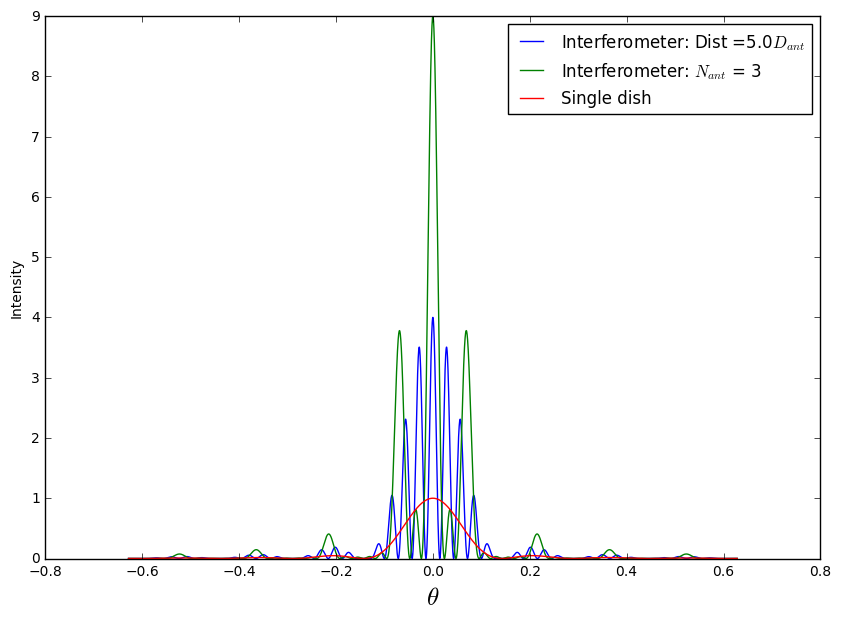

In [62]:
fig,ax = plt.subplots(1,1,figsize=(10,7))
ax.set_xlabel(r'$\theta$',fontsize=18)
ax.set_ylabel('Intensity')

theta = np.linspace(-np.pi/5,np.pi/5,num=10000)
wv = 200    # wavelength 
a = 1400    # diameter
d = 5*1400  # distance between antennas

phi = np.pi*d*np.sin(theta)/wv
I_dist = ((np.sin(2*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
ax.plot(theta,I_dist,label=r'Interferometer: Dist =%.1f$D_{ant}$'%(d/a))

d = 2*1400  # distance between antennas
N = 3       # number of antennas
phi = np.pi*d*np.sin(theta)/wv
I_nant = ((np.sin(N*phi)/np.sin(phi))*np.sinc(a*np.sin(theta)/wv))**2
ax.plot(theta,I_nant,label='Interferometer: $N_{ant}$ = %d'%N)

I_dish = (np.sinc(a*np.sin(theta)/wv))**2
ax.plot(theta,I_dish,label='Single dish')

ax.legend(loc=1)

## Conclusions from plot above:

### Fixed number of antennas:

If you have a fixed number of antennas- placing them farthest away from each other is the best for resolution. With increasing distance:

1. Number of fringes in the primary beam (of a single dish in that array) increase.
2. Beam width of the fringes decreases.

### Fixed distance:

If you have fixed real estate to build antennas- building as many as you can is the best for resolution. With increasing number of antennas:

1. Amplitude of the fringes gets modulated- the central beam is more and more peaked.
2. There are grating lobes.

The optimum is reached when the entire area is filled with dishes. When antennas are placed next to each other, the grating lobes disappear entirely and you are left with a large amplitude primary maxima.

# Effect of Zero Padding on Beams

Zero padding should not affect resolution, but it somehow creates more beams.

?? How does this work?

# Effect of Frequency on Beams

At a higher frequency, the beams are closer together. If the bandwidth of your instrument is high you should take this into account before stacking images.

?? Why did Nithya say standard map making techniques don't take this account?

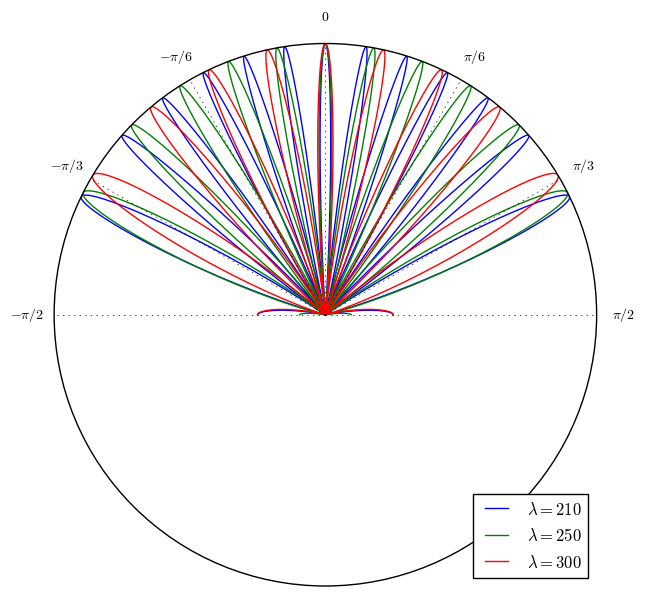

In [67]:
theta = np.linspace(-np.pi/2,np.pi/2,num=1000)
wv = [210, 250, 300]
d = 1400
I = {}
for l in wv:
    I[l] = (np.cos(np.pi*d*np.sin(theta)/l))**2

plt.rcParams['figure.figsize'] = (7,7)
ax1 = plt.subplot(111,projection='polar')
ax1.set_theta_zero_location('N')
ax1.set_theta_direction(-1)
ax1.set_xticks([0,np.pi/6,np.pi/3,np.pi/2,3*np.pi/2,5*np.pi/3,11*np.pi/6])
ax1.set_xticklabels([r'$0$',r'$\pi /6$',r'$\pi /3$',r'$\pi /2$',r'$-\pi /2$',r'$-\pi /3$',r'$-\pi /6$'])
ax1.set_yticks([])
ax1.set_yticklabels([])
for l in wv:
    ax1.plot(theta,I[l],label=r'$\lambda = %d$'%l)
ax1.legend(loc=4)